In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [4]:
survey = pd.read_csv("masculinity.csv")
print(survey.columns)
print(len(survey))
print(survey["q0007_0001"].value_counts())
print(survey.head())

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [5]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]

for col in cols_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
    
print(survey['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


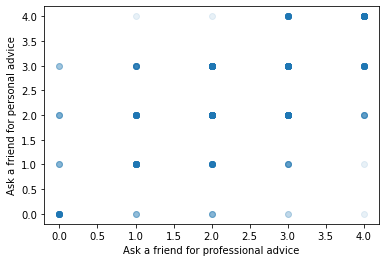

In [6]:
plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.1)
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

In [7]:
rows_to_cluster = survey.dropna(subset = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"])
classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"]])
print(classifier.cluster_centers_)

[[1.872      1.84       0.84533333 1.71733333 0.56266667 2.63466667
  1.97333333]
 [2.84470247 2.81422351 2.83599419 2.40058055 0.69811321 3.07111756
  2.89550073]]


In [8]:
print(classifier.labels_)

cluster_zero_indices = []
cluster_one_indices = []
for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
        
print(cluster_zero_indices)

[1 0 1 ... 1 0 0]
[1, 4, 6, 7, 9, 10, 12, 14, 17, 18, 19, 24, 29, 35, 39, 42, 49, 51, 52, 53, 54, 55, 57, 58, 62, 63, 65, 66, 75, 78, 79, 82, 84, 86, 87, 88, 89, 90, 92, 94, 95, 97, 98, 101, 106, 107, 113, 116, 117, 119, 123, 128, 129, 130, 131, 132, 134, 139, 142, 143, 154, 172, 175, 176, 178, 179, 180, 181, 184, 187, 189, 195, 196, 198, 199, 201, 209, 212, 222, 229, 230, 231, 233, 236, 237, 240, 241, 247, 248, 249, 250, 256, 260, 261, 263, 264, 272, 275, 281, 283, 284, 286, 288, 291, 296, 297, 299, 300, 301, 305, 310, 311, 325, 328, 331, 336, 337, 340, 341, 343, 347, 350, 351, 353, 361, 367, 369, 377, 378, 390, 391, 392, 393, 394, 396, 397, 398, 399, 409, 410, 411, 412, 415, 417, 418, 419, 425, 428, 429, 432, 449, 454, 455, 457, 459, 461, 463, 468, 470, 471, 476, 477, 478, 484, 489, 490, 493, 494, 496, 498, 499, 502, 508, 509, 510, 515, 516, 521, 523, 525, 526, 529, 531, 533, 542, 546, 549, 555, 556, 559, 560, 562, 563, 564, 566, 567, 570, 577, 579, 580, 585, 588, 589, 592, 593, 599,

In [9]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))

Some college            0.309333
College or more         0.288000
Post graduate degree    0.253333
High school or less     0.146667
Name: educ4, dtype: float64
Post graduate degree    0.364296
College or more         0.329463
Some college            0.233672
High school or less     0.072569
Name: educ4, dtype: float64
